# Polish monetary classification
Evaluation of test set and prediction on single image

In [1]:
#Load libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import datetime
import matplotlib.pyplot as plt

In [2]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Get model and test set from google drive
!cp /content/drive/MyDrive/test.zip .
!cp /content/drive/MyDrive/monetary.h5 .
!unzip test.zip

In [40]:
width = 224
height = 224

In [30]:
#Load model
model = keras.models.load_model('monetary.h5')
np.set_printoptions(suppress=True)

In [33]:
#Create preprocessing generator (for rescaling)
test_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
)

In [37]:
#Load dataset from directory
test_set = test_datagen.flow_from_directory("/content/test", target_size=(width,height))

Found 50 images belonging to 9 classes.


In [42]:
#Inversion map to know which class we predicted (Because flow from directory could rearrange in its own way)
inv_map = {v: k for k, v in test_set.class_indices.items()}

In [46]:
inv_map

{0: '1', 1: '10', 2: '11', 3: '2', 4: '20', 5: '22', 6: '5', 7: '50', 8: '55'}

In [39]:
#Evaluate test set
model.evaluate(test_set)

2/2 [==============================] - 2s 247ms/step - loss: 0.0381 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000


[0.03810803219676018, 1.0, 1.0, 1.0]

10
[[0.0009659  0.9579932  0.00289946 0.00106685 0.00186501 0.00141356
  0.01444033 0.01286578 0.0064899 ]]


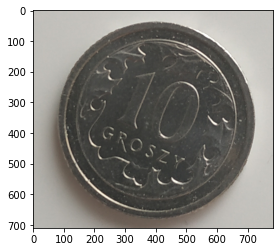

In [43]:
#Evaluation on a single image from dataset
image = tf.keras.preprocessing.image.load_img("/content/test/10/IMG_20210507_131102.jpg")
plt.imshow(image)
image = image.resize((224,224))
input_arr = keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr/255.0])  # Convert single image to a batch.
predictions = model.predict(input_arr)

#Print which class we predicted
print(inv_map[predictions.argmax()])

#Prediction percent
print(predictions)